In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\harsh/nltk_data'
    - 'C:\\Users\\harsh\\anaconda3\\nltk_data'
    - 'C:\\Users\\harsh\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\harsh\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\harsh\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [5]:
df=pd.read_csv("C:\\Users\\harsh\\Downloads\\IMDB Dataset.csv\\IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
# number of observation and features:
df.shape

(50000, 2)

In [9]:
# data info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<Axes: xlabel='sentiment'>

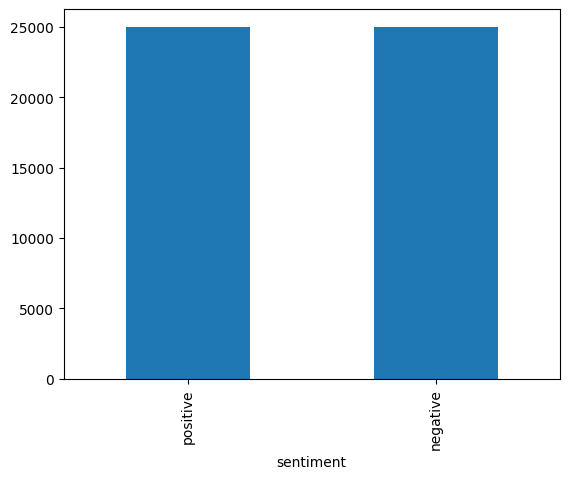

In [11]:
df['sentiment'].value_counts().plot(kind='bar')

In [13]:
df= pd.get_dummies(df, columns= ['sentiment'],drop_first= True)

In [15]:
df.head()

,review,sentiment_positive
0,One of the other reviewers has mentioned that ...,True
1,A wonderful little production. <br /><br />The...,True
2,I thought this was a wonderful way to spend ti...,True
3,Basically there's a family where a little boy ...,False
4,"Petter Mattei's ""Love in the Time of Money"" is...",True


In [23]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [25]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def cleantext(text):
    text= text.lower()
    text= re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text= re.sub(r"http\S+", "",text)
    text= re.sub(r"http", "",text)
    
    punctuations= '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text= text.replace(p, '')
        
    text= [word.lower() for word in text.split() if word.lower() not in sw]
    
    text= [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text)
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text= emoji_pattern.sub(r'',text)
    
    return text

In [29]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Make sure to download the stopwords if you haven't already
# import nltk
# nltk.download('stopwords')

lemmatizer = WordNetLemmatizer() 

def cleantext(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"http", "", text)
    return text

df['review'] = df['review'].apply(lambda x: cleantext(x))


In [31]:
df['review'] = df['review'].apply(lambda x: cleantext(x))
 
df.head()

,review,sentiment_positive
0,one of the other reviewers has mentioned that ...,True
1,a wonderful little production. br br the filmi...,True
2,i thought this was a wonderful way to spend ti...,True
3,basically there s a family where a little boy ...,False
4,petter mattei s love in the time of money is a...,True


In [35]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

# Ensure stopwords are downloaded if not done already
# import nltk
# nltk.download('stopwords')

lemmatizer = WordNetLemmatizer() 

def cleantext(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"http", "", text)
    return text

df['review'] = df['review'].apply(lambda x: cleantext(x))

X = df['review']
y = df['sentiment_positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)


In [39]:
X= df['review']
y= df['sentiment_positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 26)

In [43]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure stopwords are downloaded if not done already
# import nltk
# nltk.download('stopwords')

lemmatizer = WordNetLemmatizer() 

def cleantext(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"http", "", text)
    return text

df['review'] = df['review'].apply(lambda x: cleantext(x))

X = df['review']
y = df['sentiment_positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)  # Applying TF-IDF to training data
tfidf_test_vectors = tfidf_vectorizer.transform(X_test)  # Applying TF-IDF to test data


In [44]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train) #applying tf idf to training data

tfidf_test_vectors = tfidf_vectorizer.transform(X_test) #applying tf idf to training data

In [45]:
# check the dimension of the data now: 
print("n_samples: %d, n_features: %d" % tfidf_train_vectors.shape)

n_samples: 40000, n_features: 90797


In [51]:
from sklearn.naive_bayes import MultinomialNB


In [53]:
#naive bayes classifier
naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(tfidf_train_vectors, y_train)

MultinomialNB()

In [55]:
#predicted y
y_pred = naive_bayes_classifier.predict(tfidf_test_vectors)

In [59]:
from sklearn.metrics import classification_report


In [61]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

       False       0.86      0.88      0.87      5067
        True       0.88      0.85      0.86      4933

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [65]:
from sklearn.metrics import confusion_matrix


In [67]:
cnf_matrix = confusion_matrix(y_test,y_pred)

cnf_matrix

array([[4475,  592],
       [ 745, 4188]], dtype=int64)

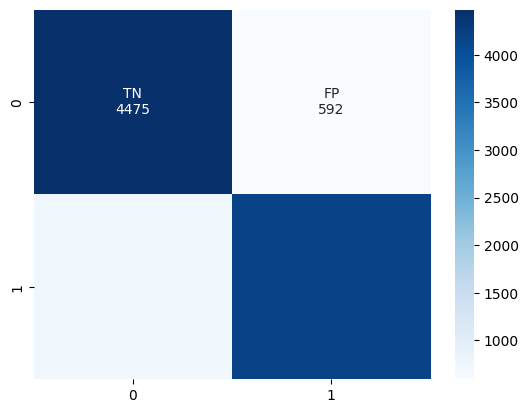

In [69]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [79]:
from sklearn.linear_model import LogisticRegression
 # Define and fit the classifier on the data
lr_classifier = LogisticRegression()
lr_classifier.fit(tfidf_train_vectors, y_train)
 # Print the accuracy score of the classifier
print(f"Validation Accuracy of Logsitic Regression Classifier is: {(lr_classifier.score(tfidf_test_vectors,y_test ))*100:.2f}%")
 # Also plot the metric


Validation Accuracy of Logsitic Regression Classifier is: 89.49%


## ramdom forest classifier 

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
 # Define and fit the classifier on the data
rf_classifier = RandomForestClassifier()
rf_classifier.fit(tfidf_train_vectors, y_train)
 # Print the accuracy score of the classifier
print(f"Validation Accuracy of Random Forest Classifier is: {(rf_classifier.score(tfidf_test_vectors,y_test ))*100:.2f}%")
 # Also plot the metric

Validation Accuracy of Random Forest Classifier is: 83.80%


## decision tree classifier 

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dt_classifier=DecisionTreeClassifier()
dt_classifier.fit(tfidf_train_vectors, y_train)
 # Print the accuracy score of the classifier
print(f"Validation Accuracy of DecisionTreeClassifierr is: {(dt_classifier.score(tfidf_test_vectors,y_test ))*100:.2f}%")
 # Also plot the metric


Validation Accuracy of DecisionTreeClassifierr is: 71.14%


## KNN

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
kn_classifier=KNeighborsClassifier()
kn_classifier.fit(tfidf_train_vectors, y_train)
 # Print the accuracy score of the classifier
print(f"Validation Accuracy of KNeighborsClassifier is: {(kn_classifier.score(tfidf_test_vectors,y_test ))*100:.2f}%")
 # Also plot the metric

Validation Accuracy of KNeighborsClassifier is: 77.79%


In [119]:
from xgboost import XGBClassifier 

In [121]:
xg_classifier=XGBClassifier()
xg_classifier.fit(tfidf_train_vectors, y_train)
 # Print the accuracy score of the classifier
print(f"Validation Accuracy of XGBClassifier is: {(xg_classifier.score(tfidf_test_vectors,y_test ))*100:.2f}%")
 # Also plot the metric

Validation Accuracy of XGBClassifier is: 85.90%
